In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime as datetime
import chart_studio.plotly as py

In [28]:
date = datetime.datetime(2020,4,1)

In [2]:
table_file = '../datos/tablas_procesadas/tabla_completa.tsv'
df = pd.read_csv(table_file,
                     sep='\t',
                     parse_dates=['fecha_inicio_sintomas', 'fecha_llegada_mx', 'fecha_caso_nuevo'])

df['fecha_caso_nuevo'] = df['fecha_caso_nuevo'].replace(pd.NaT, datetime.datetime(2020,3,15))
df['count'] = len(df) * [1]
df = df[['estado', 'procedencia', 'fecha_caso_nuevo', 'count']]

In [26]:
df.head()

,estado,procedencia,fecha_caso_nuevo,count
0,Ciudad de México,Italia,2020-03-15,1
1,Sinaloa,Italia,2020-03-15,1
2,Ciudad de México,Italia,2020-03-15,1
3,Coahuila,Italia,2020-03-15,1
4,Chiapas,Italia,2020-03-15,1


In [25]:
df2 = df.groupby(['fecha_caso_nuevo']).sum().reset_index()

df2['count_cumulativo'] = df2['count'].cumsum()

In [27]:
df2.head()

,fecha_caso_nuevo,count,count_cumulativo
0,2020-03-15,52,52
1,2020-03-16,30,82
2,2020-03-17,11,93
3,2020-03-18,25,118
4,2020-03-19,46,164


In [8]:
recent_day = sorted(df['fecha_caso_nuevo'].value_counts().index)[-1].strftime('%Y-%m-%d')

In [9]:
html='../figuras/20200401_cumulativenational.html'

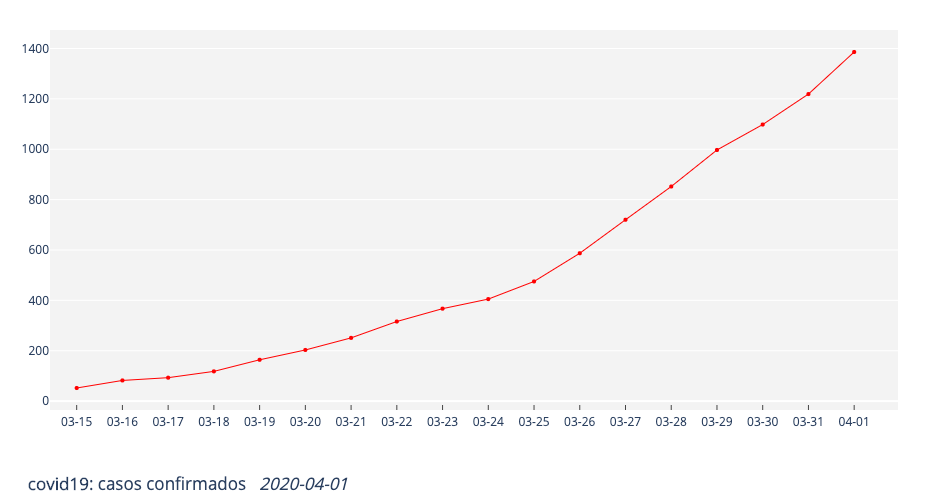

In [37]:
fig = go.Figure()

fig.add_trace(go.Scatter(
        x=df2['fecha_caso_nuevo'],
        y=df2['count_cumulativo'],
        mode='lines+markers',
        marker=dict(color='rgb(255, 0, 0)',
                    size=4),
        line=dict(width=1)))

fig.update_layout(title={'text': '<b>covid19</b>: casos confirmados   <i>{}</i>'.format(recent_day),
                         'x': 0.03,
                         'y': 0.02},
                  width=900,
                  height=500,
                  margin={"r":30,"t":30,"l":50,"b":90},
                  autosize=False,
                  plot_bgcolor='rgb(243, 243, 243)',
                  xaxis=dict(showline=True,
                             showgrid=False,
                             linewidth=2,
                             type='date',
                             range=[datetime.datetime(2020,3,15-1,10),
                                    date.replace(hour=23)],
                             dtick='2000-01-01',
                             tickformat='%m-%d',
                             ticks='inside',
                             ticklen=5),
                  yaxis=dict(autorange=True)
                 )
fig.write_html(html)
fig.show()

In [41]:
plotly_url = py.plot(fig, filename = '{}_growth'.format(date.strftime('%Y%m%d')), auto_open=True)

In [42]:
df2.to_csv('../datos/tablas_procesadas/acumulados_nacional/{}_acumulados-nacional.tsv'.format(date.strftime('%Y%m%d')),
           sep='\t',
           index=None)

## Por estado

In [43]:
df3_cum = df.groupby(['estado', 'fecha_caso_nuevo']).sum().groupby(level=[0]).cumsum().reset_index()

In [44]:
df3_cum

,estado,fecha_caso_nuevo,count
0,Aguascalientes,2020-03-15,1
1,Aguascalientes,2020-03-19,4
2,Aguascalientes,2020-03-23,6
3,Aguascalientes,2020-03-25,12
4,Aguascalientes,2020-03-26,13
...,...,...,...
304,Zacatecas,2020-03-22,2
305,Zacatecas,2020-03-23,3
306,Zacatecas,2020-03-26,4
307,Zacatecas,2020-03-29,5


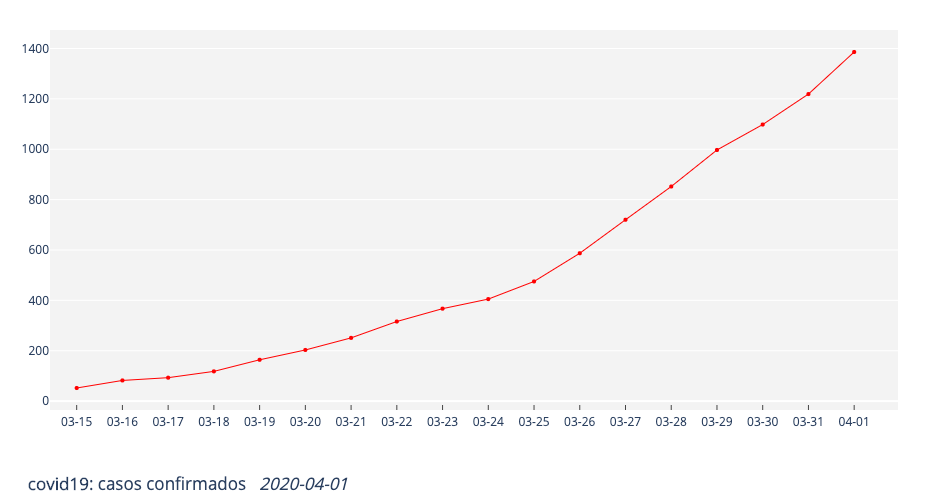

In [45]:
fig.data[0].update(mode='markers+lines')
fig

In [46]:
import plotly.express as px

In [47]:
top_d3_cum = df3_cum[df3_cum['fecha_caso_nuevo'] == recent_day].sort_values(by='count', ascending=False).head(5)

In [48]:
plottop = df3_cum[df3_cum['estado'].isin(top_d3_cum['estado'])]

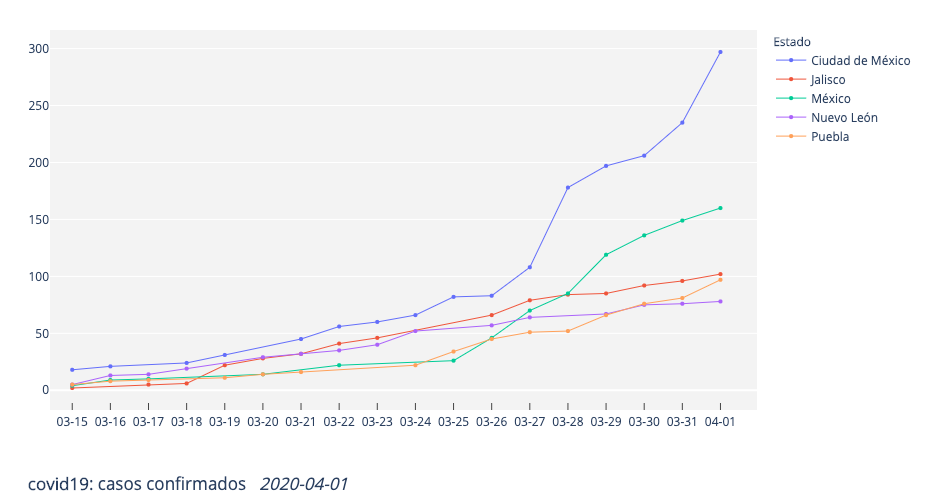

In [52]:
fig = px.scatter(plottop, x="fecha_caso_nuevo", y="count", color="estado", hover_data=['count'])
for i in range(0,len(fig.data)):
    fig.data[i].update(mode='markers+lines',
                       marker=dict(size=4),
                       line=dict(width=1))

fig.update_layout(title={'text': '<b>covid19</b>: casos confirmados   <i>{}</i>'.format(recent_day),
                         'x': 0.03,
                         'y': 0.02},
                  width=900,
                  height=500,
                  margin={"r":30,"t":30,"l":50,"b":90},
                  autosize=False,
                  plot_bgcolor='rgb(243, 243, 243)',
                  xaxis=dict(showline=True,
                             showgrid=False,
                             linewidth=2,
                             type='date',
                             range=[datetime.datetime(2020,3,15-1,10),
                                    date.replace(hour=23)],
                             dtick='2000-01-01',
                             tickformat='%m-%d',
                             ticks='inside',
                             ticklen=7,
                             title=None),
                  yaxis=dict(autorange=True,
                             title=None),
                 legend_title='<b>Estado</b>'
                 )
fig.show()

In [53]:
fig.write_html('../figuras/{}_acumulados-estado.html'.format(date.strftime('%Y%m%d')))

In [55]:
plotly_url = py.plot(fig, filename = '{}_acumulados-estado'.format(date.strftime('%Y%m%d')), auto_open=True)

In [56]:
df3_cum.to_csv('../datos/tablas_procesadas/acumulados_estado/{}_acumulados-estado.tsv'.format(date.strftime('%Y%m%d')),
               sep='\t',
               index=None)